<b>Explarotary Analysis for Store Data<b>

- Handling for missing entries
- Data types and formats that should be chaged
- Univariate analysis of the feature
- Bivariate anlaysis of the feature

In [1]:
import imp
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sys.path.append('../')
from scripts.missing_info import MissingValue
from scripts.ploting import Plots
from scripts.Clean_data import  DataCleaner
miss_val = MissingValue()
cleaner=DataCleaner()

In [3]:

df_store = pd.read_csv('../data/store.csv')
df_store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [5]:
miss_val.missing_values_table(df_store)

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


In [4]:
pl = Plots(10,6)

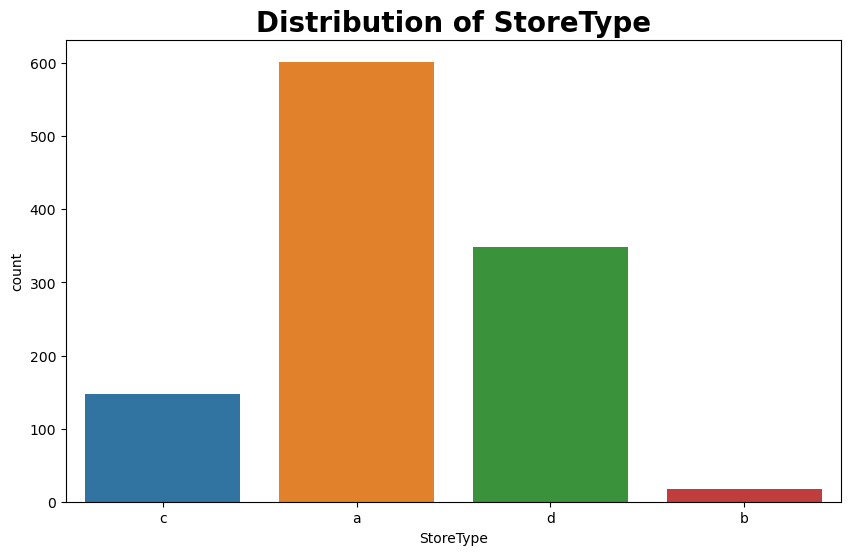

In [5]:
pl.plot_count(df_store,'StoreType')

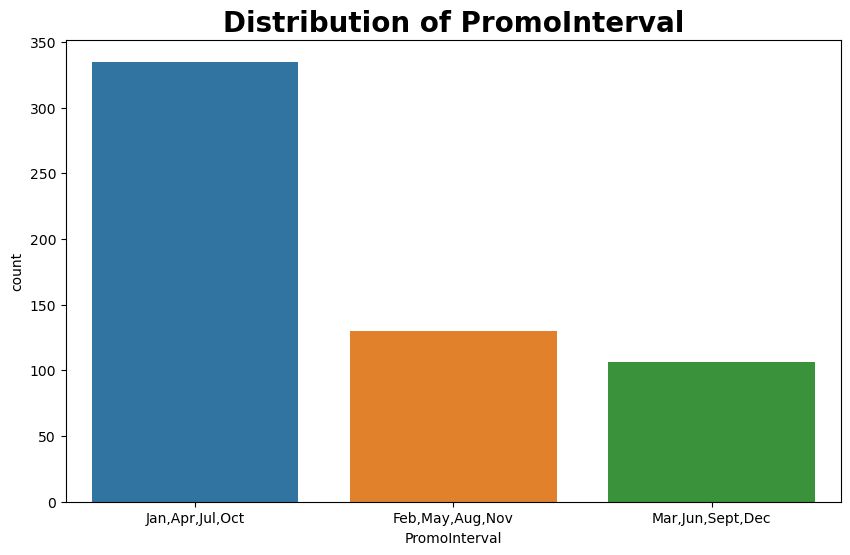

In [6]:
pl.plot_count(df_store,'PromoInterval')

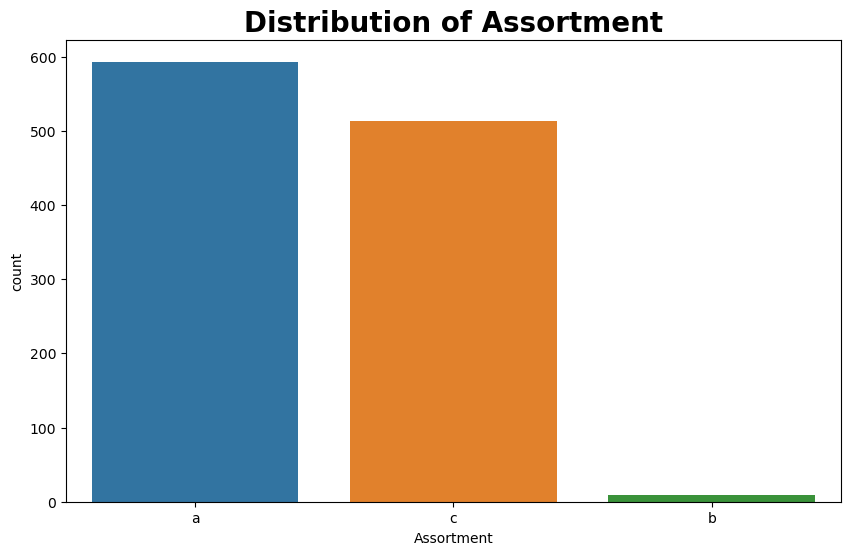

In [7]:
pl.plot_count(df=df_store,column='Assortment')

Bivariate Analysis

Text(0.5, 1.0, 'Store Promo outliers')

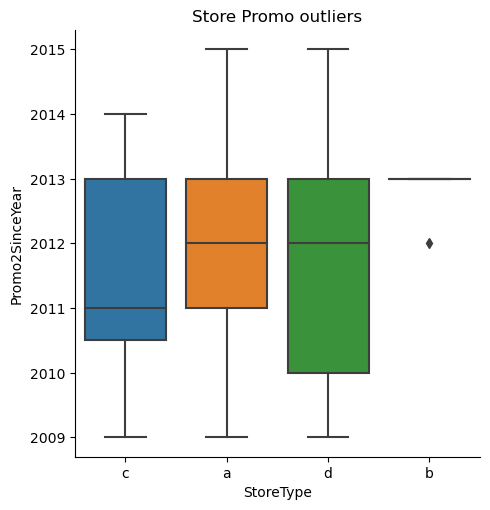

In [8]:
sns.catplot(x="StoreType", y="Promo2SinceYear", kind="box",
            data=df_store.query("Promo2SinceYear!=0"))
plt.title("Store Promo outliers")

Text(0.5, 1.0, 'Store Assortment Type')

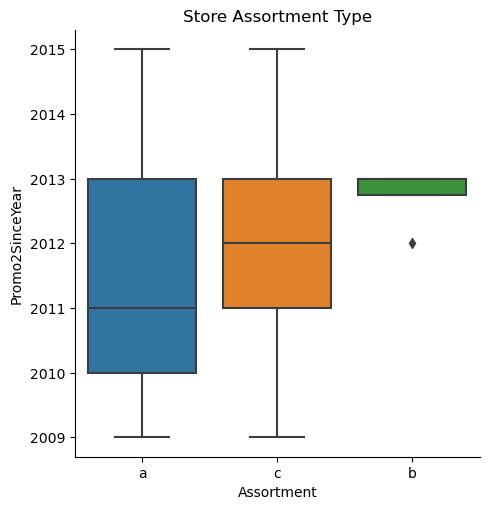

In [10]:
sns.catplot(x="Assortment", y="Promo2SinceYear", kind="box",
            data=df_store.query("Promo2SinceYear!=0"))
plt.title("Store Assortment Type")

Text(0.5, 1.0, 'StoreType vs CompetitionDistance')

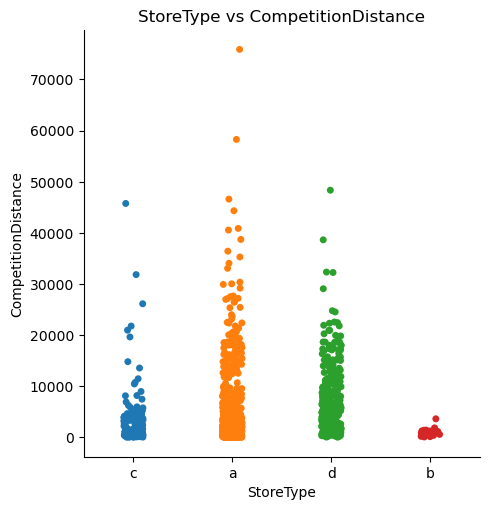

In [9]:
sns.catplot(x="StoreType", y="CompetitionDistance", data=df_store)
plt.title("StoreType vs CompetitionDistance")

Text(0.5, 1.0, 'Assortment vs CompetitionDistance')

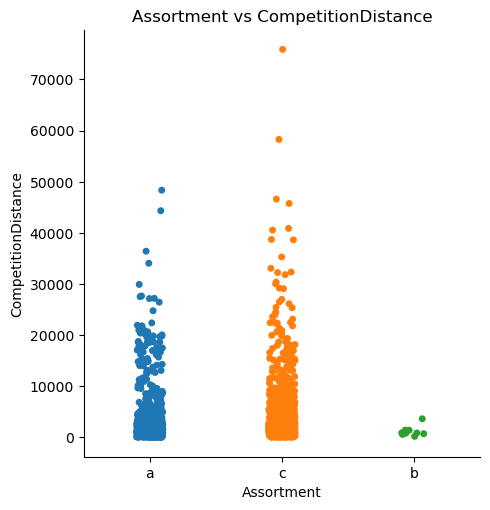

In [11]:
sns.catplot(x="Assortment", y="CompetitionDistance", data=df_store)
plt.title("Assortment vs CompetitionDistance")

<AxesSubplot:>

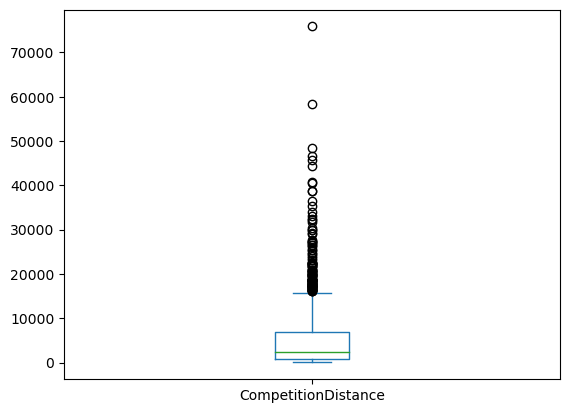

In [12]:
df_store['CompetitionDistance'].plot.box()

In [13]:
df_store.skew()

/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_1124/2678369603.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_store.skew()


Store                        0.000000
CompetitionDistance          2.929286
CompetitionOpenSinceMonth   -0.170750
CompetitionOpenSinceYear    -8.013062
Promo2                      -0.048510
Promo2SinceWeek              0.074057
Promo2SinceYear             -0.119616
dtype: float64

- From the above observation the CompetitionDistance is skewed
- It also have alot of outliers
- Hence, filling the missing with mode and handle the outliers using winsorize.

In [15]:
store_df = cleaner.fill_mode(
    df_store, ['CompetitionDistance'])

<AxesSubplot:>

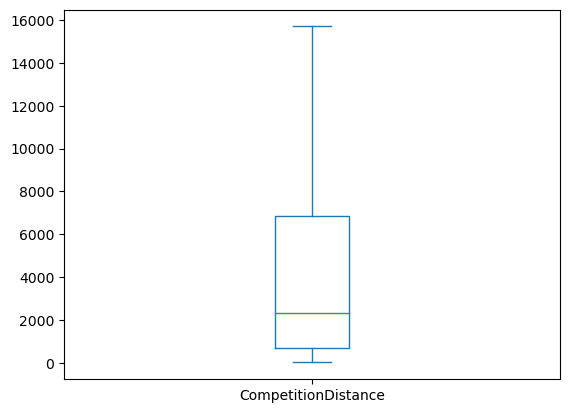

In [19]:
from scipy.stats.mstats import winsorize

df_store['CompetitionDistance'] = winsorize(
    df_store['CompetitionDistance'], (0.0, 0.10))
df_store['CompetitionDistance'].plot.box()

In [ ]:
df_store.to_csv('../data/cleaned_store.csv',index=False)